# Lack of Robustness of the Markowitz Procedure, and the GMV

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
l = ['Food', 'Steel']
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [4]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
# MSR is based on past returns, but we cannot assume in 1996 that in 2000 ER would like this. Let's assume another ERs
erk.msr(0.1, np.array([0.11, 0.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [7]:
# A small change in ER delivers a big change in weights !
erk.msr(0.1, np.array([0.1, 0.13]), cov.loc[l,l])

array([0., 1.])

In [8]:
erk.msr(0.1, np.array([0.13, 0.1]), cov.loc[l,l])

array([1., 0.])

<AxesSubplot:xlabel='Volatility'>

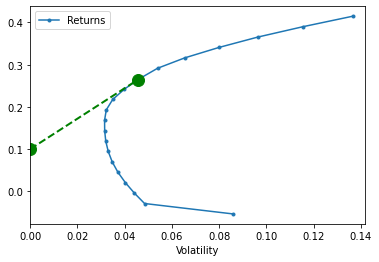

In [9]:
# Opposite direction with small changes in ERs. HUGE problem
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

<AxesSubplot:xlabel='Volatility'>

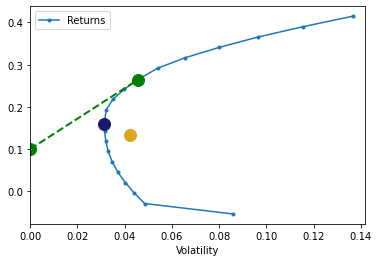

In [11]:
# On that Efficient Frontier, there is one portfolio that does not depend on ER. the Global Minimum Variance Portfolio.
# Also, an Equally Weighted Portfolio does not depend on ER, since it's a naive way of contruct a Portfolio
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)